<a href="https://colab.research.google.com/github/Bingle-labake/deeplearn/blob/master/3/3/3_3_7_weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 134985 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
cd /content/drive/colab/3_3_7/

/content/drive/colab/3_3_7


##权重初始化
在这节课，你将学习如何为神经网络设置合适的初始权重。权重初始化只发生一次，发生在模型创建时及训练之前。合适的初始权重使神经网络更接近最佳模型，从而使神经网络能更快地达到最佳模型。

![替代文字](http://p7.qhimg.com/t016182dd0b44c10446.png)

##初始权重和观察训练损失
要查看不同权重的效果，我们将用相同的数据集和神经网络进行测试。这样我们就知道模型行为的任何变化是由权重导致的，而不是数据变化或模型架构导致的。


> 我们将实例化至少两个相同的模型，并且具有不同的初始权重，看看训练损失是如何降低的，如以下示例所示。

![替代文字](http://p2.qhimg.com/t012166aff403cb417b.png)


有时候训练损失的差异将很大，有时候某些权重带来的改进很小。

##数据集和模型

我们将训练 MLP 对 Fashion-MNIST 数据库中的图像进行分类，演示不同初始权重的影响。注意，Fashion MNIST 数据集包含服饰类图像；classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']。图像已标准化，因此像素值范围是 [0.0 - 1.0)。请运行以下单元格，以下载和加载数据集。



---


####练习

[正态分布练习代码的链接](https://)

###导入库并加载[数据](https://pytorch.org/docs/stable/torchvision/datasets.html)

In [0]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 100
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.FashionMNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

0it [00:00, ?it/s]

26427392it [00:09, 2688589.93it/s]                              


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:03, 10005.42it/s]            


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

4423680it [00:04, 979963.51it/s]                              


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

  0%|          | 0/5148 [00:01<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


###可视化一些训练数据

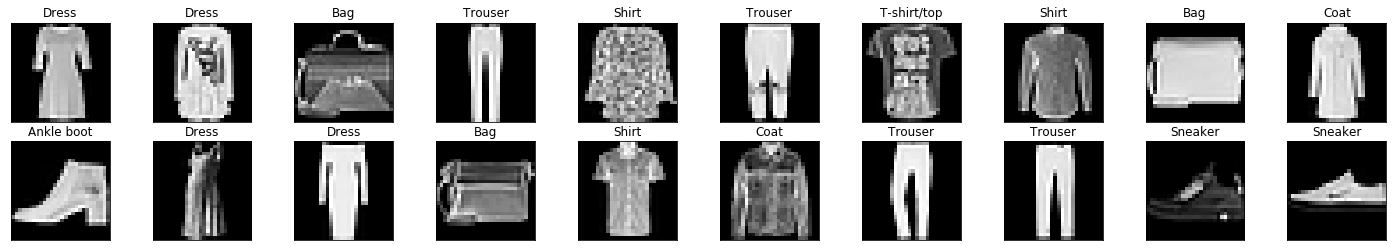

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

##**定义模型架构**
我们定义了用于分类数据集的 MLP。

###**神经网络**

![替代文字](http://p1.qhimg.com/t01bd315afad7399ce7.png)


*   该 MLP 有 3 层，隐藏层的大小为 256 和 128。
*   该 MLP 接受扁平化图像（长为 784 的向量），并生成 10 个类别分数。



---



我们将用这个 3 层神经网络测试不同初始权重的效果，该网络使用的是 ReLU 激活函数和 Adam 优化器。

这里提到的经验适用于包含不同激活函数和优化器的其他神经网络。



---


##**初始化权重**
我们先来看看某些初始权重。

###**全为 0 和 1**
如果你知道Occam's razor定律，你可能认为将所有权重设为 0 或 1 是最佳策略。但事实并非如此。

如果所有权重一样，每个层级的所有神经元都将生成相同的输出。这样就很难判断要调整哪些权重。

我们定义两个模型并将权重全设为 1 或 0，比较这两种模型的损失

下面我们使用 PyTorch 的nn.init 用常量权重初始化每个线性层级。init 库提供了大量权

重初始化函数，让你能够根据层级类型初始化每个层级的权重。

在下面的情形中，我们查看模型里的每个层级/模块。如果是线性层级（这个 MLP 的所有三

个层级都是线性层级），则将这些层级的权重初始化为 constant_weight，偏差为 0，代码

如下所示：



```
if isinstance(m, nn.Linear): nn.init.constant_(m.weight, constant_weight) nn.init.constant_(m.bias, 0)
```



In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self, hidden_1=256, hidden_2=128, constant_weight=None):
        super(Net, self).__init__()
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (hidden_1 -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (hidden_2 -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)
        
        # initialize the weights to a specified, constant value
        if(constant_weight is not None):
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.constant_(m.weight, constant_weight)
                    nn.init.constant_(m.bias, 0)
    
            
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

##**比较模型行为**
下面我们使用 helpers.compare_init_weights 比较在上面定义的两个模型 model_0 和 model_1 的训练和验证损失。此函数的输入参数是模型列表（每个具有不同的初始权重）、要生成的图形的名称，以及训练和验证数据集加载器。对于每个给定模型，它将绘制前 100 批的训练损失，并输出 2 个训练周期后的验证准确率。注意：如果批次大小很小，则可能需要增加周期数，以便更好地比较模型在观察几百张图像之后的行为。


我们绘出前 100 批的损失，以便更好地判断哪种模型权重在训练开始时效果更好。**建议查看 helpers.py 中的代码，详细了解模型是如何训练、验证和比较的。**


请运行以下单元格，看看权重全为 0 和全为 1 的差别。

In [0]:
# initialize two NN's with 0 and 1 constant weights
model_0 = Net(constant_weight=0)
model_1 = Net(constant_weight=1)

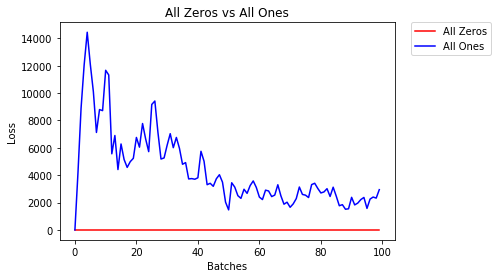

After 2 Epochs:
Validation Accuracy
    9.558% -- All Zeros
    9.775% -- All Ones
Training Loss
    2.302  -- All Zeros
  350.195  -- All Ones


In [0]:
import helpers

# put them in list form to compare
model_list = [(model_0, 'All Zeros'),
              (model_1, 'All Ones')]


# plot the loss over the first 100 batches
helpers.compare_init_weights(model_list, 
                             'All Zeros vs All Ones', 
                             train_loader,
                             valid_loader)

可以看出，对于全为 0 和 1 来说，准确率都和猜测结果差不多，约为 10%

神经网络很难判断哪些权重需要更改，因为每个层级的神经元输出是一样的。为了避免神经元具有相同的输出，我们使用独特权重。我们还可以随机选择权重，避免每个周期后的损失都陷于局部最低点。

获取随机权重的很好方法是从均匀分布里取样。


###**均匀分布**

[均匀分布](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous%29)从一组数字里选择任何数字的概率是一样的。我们将从连续分布里选择数字，因此选择相同数字的概率很低。我们将使用 NumPy 的 np.random.uniform 函数从均匀分布里随机选择数字。



> ```
np.random_uniform(low=0.0, high=1.0, size=None)`
```
从均匀分布里随机选择值。

> 生成的值符合均匀分布，范围是[low, high)。下限包含在内，而上限不包含。

> *   low：要生成的随机值的范围下限。默认为 0。
*   high：要生成的随机值的范围上限。默认为 1。
*   大小：一个整数或整数元组，指定输出数组的形状。


我们可以使用直方图可视化均匀分布。我们使用 helper.hist_dist 函数将 np.random_uniform(-3, 3, [1000]) 中的值映射到直方图。它们将是 1000 个随机浮点值，范围从 -3 到 3，不含值 3。

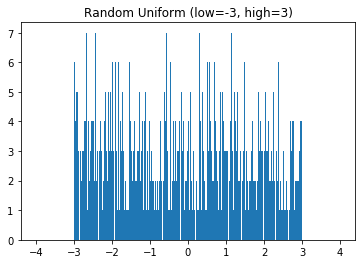

In [0]:
helpers.hist_dist('Random Uniform (low=-3, high=3)', np.random.uniform(-3, 3, [1000]))

直方图针对 1000 个值使用了 500 个区间。因为落入任何区间的概率是一样的，因此每个区间应该约有 2 个值。直方图正好是这种效果。某些区间有更多值，某些有更少的值，但是约为 2 个。


你已经了解均匀函数，我们使用 PyTorch 的 nn.init 将其应用到模型的初始权重上。


###**均匀分布，基准**

我们看看使用均匀权重初始化方式的神经网络训练效果如何，其中 low=0.0 和 high=1.0。下面我将演示另一种初始化网络权重的方式（除了 Net 类中的代码之外）。要在函数定义部分之外定义权重，你可以：


> 1.定义一个函数，它将按照网络层级类型分配权重，然后 2.使用 model.apply(fn) 将这些权重应用到初始化的模型上，它会向每个模型层级应用一个函数。


这次我们将使用 weight.data.uniform_ 直接初始化模型的权重。

In [0]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # apply a uniform distribution to the weights and a bias=0
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)

In [0]:
# create a new model with these weights
model_uniform = Net()
model_uniform.apply(weights_init_uniform)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

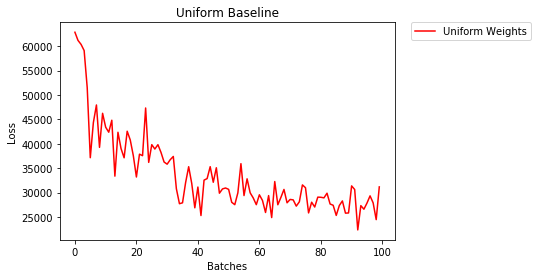

After 2 Epochs:
Validation Accuracy
   34.517% -- Uniform Weights
Training Loss
    4.039  -- Uniform Weights


In [0]:
# evaluate behavior 
helpers.compare_init_weights([(model_uniform, 'Uniform Weights')], 
                             'Uniform Baseline', 
                             train_loader,
                             valid_loader)



---


损失图表明神经网络在学习，而权重全为 0 或 1 时没有在学习。这表示我们的做法是正确的！

###**设置权重的一般法则**
设置神经网络权重的一般法则是将它们设为接近 0，但是不能太小。


> 建议初始权重的范围是  [−𝑦,𝑦] ，其中  𝑦=1/𝑛⎯⎯√ 
（ 𝑛  是指给定神经元的输入数量）。


我们看看这个法则是否成立。我们创建一个基准模型，并使均匀分布以 0 居中，范围偏移 0.5，得出范围是 [-0.5, 0.5)。

In [0]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform_center(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # apply a centered, uniform distribution to the weights
        m.weight.data.uniform_(-0.5, 0.5)
        m.bias.data.fill_(0)

# create a new model with these weights
model_centered = Net()
model_centered.apply(weights_init_uniform_center)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

然后创建一个分布和使用一般法则初始化权重的模型；范围是  [−𝑦,𝑦] ，其中  𝑦=1/𝑛⎯⎯√ 。

最后比较这两种模型。

In [0]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

# create a new model with these weights
model_rule = Net()
model_rule.apply(weights_init_uniform_rule)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

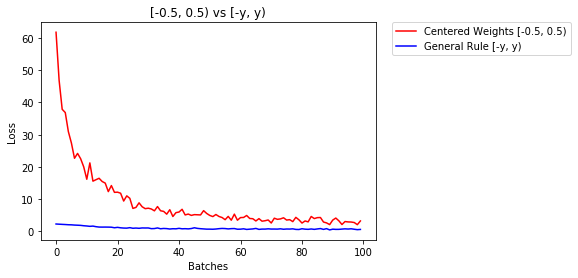

After 2 Epochs:
Validation Accuracy
   75.200% -- Centered Weights [-0.5, 0.5)
   84.200% -- General Rule [-y, y)
Training Loss
    0.543  -- Centered Weights [-0.5, 0.5)
    0.318  -- General Rule [-y, y)


In [0]:
# compare these two models
model_list = [(model_centered, 'Centered Weights [-0.5, 0.5)'), 
              (model_rule, 'General Rule [-y, y)')]

# evaluate behavior 
helpers.compare_init_weights(model_list, 
                             '[-0.5, 0.5) vs [-y, y)', 
                             train_loader,
                             valid_loader)

模型行为很不错！不仅损失降低了，而且遵守一般法则的均匀权重损失似乎下降得很快；仅过了两个周期，验证准确率就很高了，这就是为什么合适的初始权重非常有助于模型训练！



---



由于均匀分布从某个范围里选择任何值的概率是一样的，如果我们使用一种分布，这种分布下，接近 0 的值被选择的概率更高，又会怎样？我们来看看正态分布。


###**正态分布**
与均匀分布不同，[正态分布](https://en.wikipedia.org/wiki/Normal_distribution)下，接近均值的数字被选中的概率更高。要可视化正态分布，我们将 NumPy 的 np.random.normal 函数中的值绘制为直方图。



> 

```
np.random.normal(loc=0.0, scale=1.0, size=None)
```


> 从正态分布里随机选择值。



> *   loc：正态分布的均值。
*   scale：正态分布的标准偏差。
*   shape：输出数组的形状。